## Hate Speech Detection

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
import re
import nltk
from nltk.util import pr
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

In [3]:
df = pd.read_csv("twitter_data.csv")

In [4]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


## Exploratory Data Analysis (EDA)

In [6]:
# Adding text-length as a field in the dataset

df['text length'] = df['tweet'].apply(len)
print(df.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  text length  
0  !!! RT @mayasolovely: As a woman you shouldn't...          140  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...           85  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...          120  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...           62  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...          137  


In [7]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet', 'text length'],
      dtype='object')

In [8]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text length
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",70
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,67
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,37


C:\Users\Diksha\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Diksha\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Diksha\anaconda3\lib\site-packages\seaborn\axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


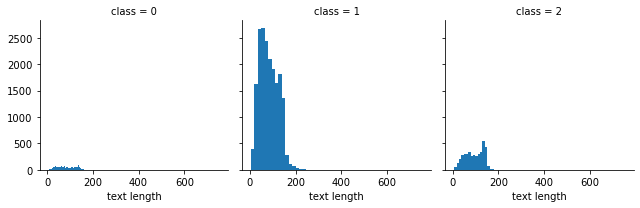

In [9]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships

import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=df, col='class')
graph.map(plt.hist, 'text length', bins=50)

- a. Distribution of text-length almost seem to be similar across all three classes
- b. Number of tweets seem to be skewed a lot higher towards the class-1

<AxesSubplot:xlabel='class', ylabel='text length'>

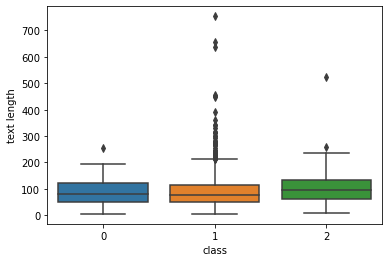

In [10]:
# Box-plot visvualization

sns.boxplot(x='class', y='text length', data=df)

From the box-plot, looks like the class-1 tweets have much longer text. There are also outliers present so text-length won’t be a useful feature to consider.

In [11]:
df['labels'] = df['class'].map({0:"Hate Speech detected", 1 : "Offensive language detected",2:"No hate and offensive speech"})

In [12]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,text length,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,No hate and offensive speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,Offensive language detected
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,Offensive language detected
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,Offensive language detected
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,Offensive language detected


In [13]:
df = df[['tweet','labels']]

In [14]:
df.head()

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate and offensive speech
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive language detected
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive language detected
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive language detected
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive language detected


## Preprocessing of the tweets

#### The preprocessing includes the following:
- 1. Removal of punctuation and capitlization
- 2. Tokenizing
- 3. Removal of stopwords
- 4. Stemming

In [15]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopword] 
    text = " ".join(text)
    
    return text

In [16]:
df['tweet'] = df['tweet'].apply(clean)

<ipython-input-16-734fefa1aea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet'] = df['tweet'].apply(clean)


In [17]:
df.head()

,tweet,labels
0,rt mayasolovely woman shouldnt complain clean...,No hate and offensive speech
1,rt boy dats coldtyga dwn bad cuffin dat hoe ...,Offensive language detected
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive language detected
3,rt cganderson vivabased look like tranny,Offensive language detected
4,rt shenikaroberts shit hear might true might ...,Offensive language detected


In [18]:
df['tweet']

0         rt mayasolovely woman shouldnt complain clean...
1         rt  boy dats coldtyga dwn bad cuffin dat hoe ...
2         rt urkindofbrand dawg rt  ever fuck bitch sta...
3                 rt cganderson vivabased look like tranny
4         rt shenikaroberts shit hear might true might ...
                               ...                        
24778    yous muthafin lie   coreyemanuel right tl tras...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wanna eat dat nigguh like aint fuck...
24781                    youu got wild bitches tellin lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object

## Visualisations

In [19]:
from wordcloud import WordCloud 
wc = WordCloud(width=500,height=500,min_font_size = 10,background_color = 'black')

In [21]:
wc.generate(df[df['labels']=="No hate and offensive speech"]['tweet'].str.cat(sep=""))

In [22]:
no_hate = wc.generate(df[df['labels']=="No hate and offensive speech"]['tweet'].str.cat(sep=""))

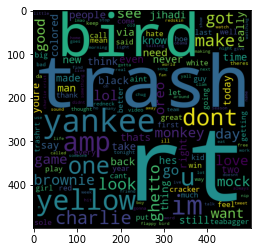

In [23]:
plt.imshow(no_hate)

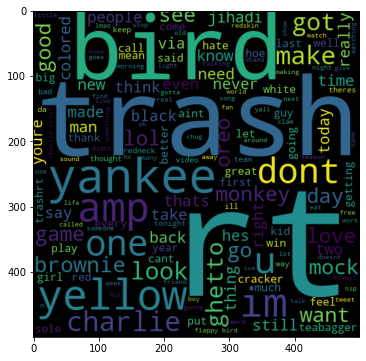

In [24]:
plt.figure(figsize = (15,6))
plt.imshow(no_hate)

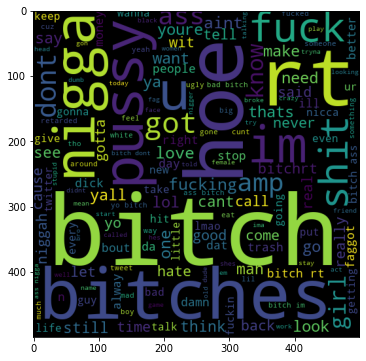

In [25]:
#word cloud for offensive words
offensive = wc.generate(df[df['labels']=="Offensive language detected"]['tweet'].str.cat(sep=""))
plt.figure(figsize = (15,6))
plt.imshow(offensive)

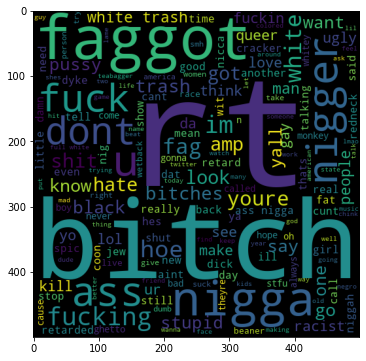

In [26]:
#word cloud for hate words
hate = wc.generate(df[df['labels']=="Hate Speech detected"]['tweet'].str.cat(sep=""))
plt.figure(figsize = (15,6))
plt.imshow(hate)

## Model Building

In [27]:
x = np.array(df['tweet'])
y = np.array(df['labels'])
#bag of words
cv = CountVectorizer() 
x = cv.fit_transform(x)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report

In [33]:
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state = 42)

In [34]:
clf = DecisionTreeClassifier()

In [35]:
clf = DecisionTreeClassifier(random_state = 20)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_test)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Decision Tree, Accuracy Score:" , acc1)

                              precision    recall  f1-score   support

        Hate Speech detected       0.34      0.29      0.31       465
No hate and offensive speech       0.79      0.84      0.81      1379
 Offensive language detected       0.92      0.92      0.92      6335

                    accuracy                           0.87      8179
                   macro avg       0.68      0.68      0.68      8179
                weighted avg       0.87      0.87      0.87      8179

Decision Tree, Accuracy Score: 0.8718669764029833


In [36]:
test_data = "I will kill you"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Hate Speech detected']


In [37]:
test_data = "you are so pretty"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['No hate and offensive speech']


In [38]:
test_data = "I are weird, I dont like you"
df = cv.transform([test_data]).toarray()
print(clf.predict(df))

['Offensive language detected']


## Running various model Using TFIDF without additional features

In [39]:
from sklearn.svm import LinearSVC

In [40]:
support =LinearSVC(random_state=20)
support.fit(X_train,y_train)
y_preds = support.predict(X_test)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVC, Accuracy Score:" , acc2)

                              precision    recall  f1-score   support

        Hate Speech detected       0.39      0.33      0.36       465
No hate and offensive speech       0.83      0.80      0.82      1379
 Offensive language detected       0.92      0.94      0.93      6335

                    accuracy                           0.88      8179
                   macro avg       0.72      0.69      0.70      8179
                weighted avg       0.88      0.88      0.88      8179

SVC, Accuracy Score: 0.8817703875779435


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = LogisticRegression().fit(X_train,y_train)
y_prediction = model.predict(X_test)
report = classification_report( y_test, y_prediction )
print(report)
acc3=accuracy_score(y_test,y_prediction)
print("Logistic Regression, Accuracy Score:" , acc3)

                              precision    recall  f1-score   support

        Hate Speech detected       0.49      0.25      0.33       465
No hate and offensive speech       0.83      0.85      0.84      1379
 Offensive language detected       0.92      0.95      0.94      6335

                    accuracy                           0.90      8179
                   macro avg       0.75      0.69      0.70      8179
                weighted avg       0.88      0.90      0.89      8179

Logistic Regression, Accuracy Score: 0.8953417288177039


C:\Users\Diksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_preds = rf.predict(X_test)
acc4=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc4)

                              precision    recall  f1-score   support

        Hate Speech detected       0.47      0.24      0.32       465
No hate and offensive speech       0.83      0.80      0.82      1379
 Offensive language detected       0.91      0.95      0.93      6335

                    accuracy                           0.89      8179
                   macro avg       0.74      0.66      0.69      8179
                weighted avg       0.87      0.89      0.88      8179

Random Forest, Accuracy Score: 0.8864164323266903


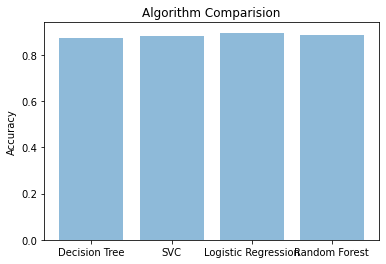

<Figure size 1440x432 with 0 Axes>

In [48]:
objects = ('Decision Tree', 'SVC', 'Logistic Regression', 'Random Forest')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3,acc4]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision')
plt.figure(figsize = (20,6))
plt.show()

In [45]:
print("Decision Tree, Accuracy Score : ",acc1)
print("SVC, Accuracy Score : ",acc2)
print("Logistic Regression, Accuracy Score : ",acc3)
print("Random Forest, Accuracy Score : ",acc4)

Decision Tree, Accuracy Score :  0.8718669764029833
SVC, Accuracy Score :  0.8817703875779435
Logistic Regression, Accuracy Score :  0.8953417288177039
Random Forest, Accuracy Score :  0.8864164323266903


In [51]:
test_data = "I will kill you"
he = cv.transform([test_data])
print(clf.predict(he))

['Hate Speech detected']


In [56]:
y_prediction = model.predict(X_test)

In [57]:
y_prediction

array(['Offensive language detected', 'Offensive language detected',
       'Offensive language detected', ..., 'No hate and offensive speech',
       'No hate and offensive speech', 'Offensive language detected'],
      dtype=object)